In [1]:
import os
import wfdb
import pickle

import numpy as np
import heartpy as hp

from scipy import signal
from matplotlib import pyplot as plt

In [2]:
# https://www.kaggle.com/code/corilei/stress-recognition-in-automobile-driver-1/notebook
# Out[74]

# В работе:
# Rest - отсутствие стресса
# Highway - средний стресс
# City - высокий стресс


# Driver 9
drivers_sessions_info = """
Driver id,Initial Rest,City 1,Highway 1,City 2,Highway 2,City 3,Final Rest,Total duration
Driver05,15.13,16.00,7.74,6.06,7.56,14.96,15.75,83.23
Driver06,15.05,14.49,7.32,6.53,7.64,12.29,15.05,78.38
Driver07,15.04,16.23,10.96,9.83,7.64,10.15,15.03,84.87
Driver08,15.00,12.31,7.23,9.51,7.64,13.43,15.07,80.19
Driver09,15.66,19.21,8.47,5.20,7.06,13.21,0.00,68.82
Driver10,15.04,15.30,8.66,5.27,7.04,12.06,14.79,78.15
Driver11,15.02,15.81,7.43,7.15,6.96,11.72,14.99,79.08
Driver12,15.01,13.41,7.56,6.50,8.06,11.68,15.01,77.23
Driver15,15.00,12.54,7.24,5.99,6.82,12.12,15.00,74.70
Driver16,15.01,16.12,7.14,5.12,6.81,13.91,0.00,64.10
"""

drivers_sessions_info = list(
    map(
        lambda x: x.split(","),
        filter(bool, drivers_sessions_info.splitlines()),
    )
)
titles = drivers_sessions_info[0][1:]
drivers_sessions_info = drivers_sessions_info[1:]
drivers_sessions_info = {
    int(el[0][6:]): list(map(float, el[1:])) for el in drivers_sessions_info
}
drivers_sessions_info = {
    key: dict(zip(titles, val)) for key, val in drivers_sessions_info.items()
}

In [3]:
records = {
    u: wfdb.rdrecord(
        os.path.join(
            "..",
            "data",
            "stress-recognition-in-automobile-drivers",
            "data",
            f"drive{str(u).zfill(2)}",
        )
    )
    for u in drivers_sessions_info.keys()
}

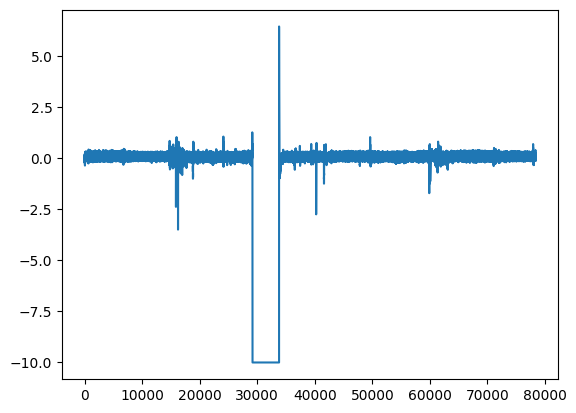

In [4]:
plt.plot(records.get(5).p_signal[:, 0])

In [211]:
records.get(10).fs

15.5

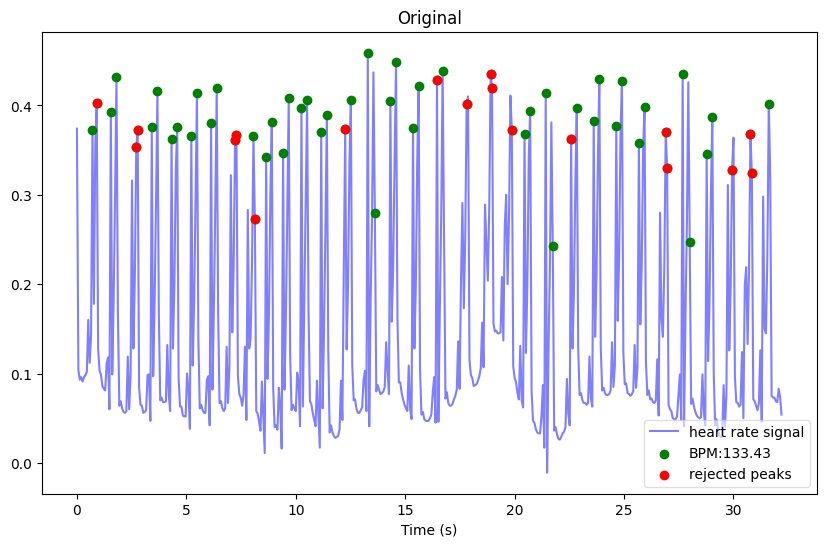

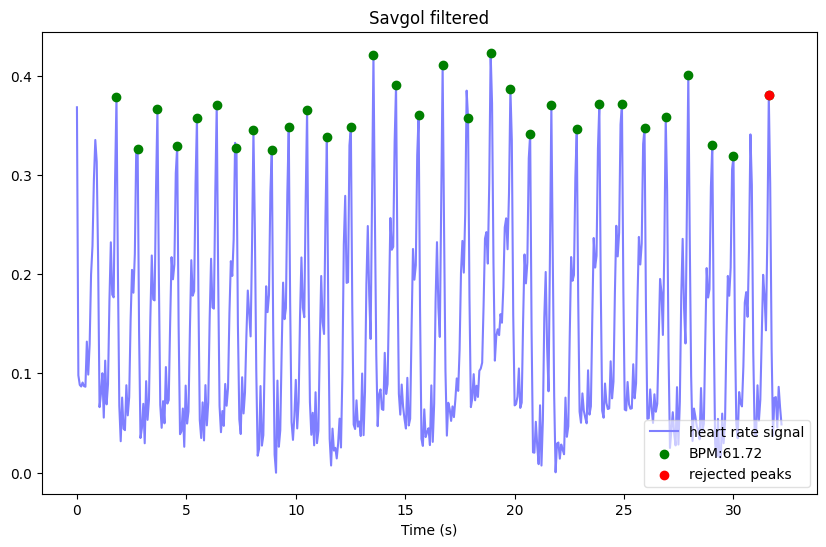

In [11]:
sig = records.get(5).p_signal[10300:10800, 0]  # 50000:57480
filtered = signal.savgol_filter(sig, 13, 9)

wd, m = hp.process(sig, 15.5)
hp.plotter(wd, m, figsize=(10, 6), title="Original")
wd, m = hp.process(filtered, 15.5)
hp.plotter(wd, m, figsize=(10, 6), title="Savgol filtered")

----

In [2]:
with open(
    "data/stress-recognition-in-automobile-drivers/cleared_drivers_session_info.pkl",
    "rb",
) as f:
    data = pickle.load(f)

In [8]:
data.get(5)[0].get("ECG_signal")

array([ 0.179, -0.083, -0.099, ..., -0.039,  0.035,  0.161])

In [16]:
sum_ = 0
for driver, values in data.items():
    print("Driver", driver)
    for range_ in values:
        wd_r = len(range_.get("working_data").get("RR_list"))
        wdf_r = len(range_.get("working_data_filtered").get("RR_list"))
        diff = wd_r - wdf_r
        sum_ += diff
        print(diff, wd_r, wdf_r)

Driver 5
213 1948 1735
993 2212 1219
114 862 748
454 1990 1536
-20 1732 1752
24 248 224
44 500 456
71 145 74
Driver 6
118 1144 1026
379 2092 1713
319 741 422
155 706 551
76 485 409
-318 938 1256
21 1068 1047
Driver 7
255 1648 1393
106 1989 1883
551 1062 511
146 918 772
295 550 255
142 943 801
101 1557 1456
Driver 8
-192 1540 1732
10 1505 1495
-91 674 765
-113 984 1097
67 469 402
-590 966 1556
-785 872 1657
Driver 9
-84 1669 1753
-136 2207 2343
376 829 453
-135 259 394
-262 365 627
13 1471 1458
Driver 10
-4 1710 1714
-12 351 363
-12 611 623
3 1825 1822
51 1735 1684
3 218 215
-6 614 620
-1 106 107
0 159 159
258 1177 919
Driver 11
3 1519 1516
156 1754 1598
-72 319 391
-287 324 611
-95 304 399
-287 674 961
-196 887 1083
Driver 12
10 542 532
5 426 421
0 97 97
0 43 43
-1 138 139
1 378 377
6 569 563
Driver 15
157 883 726
17 597 580
-7 283 290
-13 202 215
-32 225 257
-19 632 651
-75 690 765
Driver 16
84 1328 1244
745 2351 1606
269 903 634
165 648 483
310 928 618
753 2140 1387


In [17]:
sum_

4194

In [12]:
len(data.get(5)[0].get("working_data_filtered").get("RR_list"))

1735